# Weather Trend Forecasting

Data Source **https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import warnings
import numpy as np
from utils.anomalies_helpers import update_plot_with_anomalies
from typing_extensions import dataclass_transform

# ignore all warnings
warnings.filterwarnings("ignore")
# set display maximun
pd.set_option('display.max_columns', None)

from utils.eda_helpers import get_location_dropdown, get_country_dropdown, eda_update_plot, get_field_dropdown

In [2]:
# read the csv data 
data = pd.read_csv('data/GlobalWeatherRepository.csv')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


<span style="font-size:20px;">**Data Dictionary**</span>

In [3]:
# data dictionary generated by AI to understand the data
data_dict = pd.read_csv('data_dictionary.csv')
data_dict[['Field','Description']]

,Field,Description
0,country,The country where the weather data is recorded.
1,location_name,"The name of the location (e.g., city, town, or..."
2,latitude,"The latitude coordinate of the location, rangi..."
3,longitude,"The longitude coordinate of the location, rang..."
4,timezone,The timezone of the location where the data is...
5,last_updated_epoch,The Unix timestamp indicating the last time th...
6,last_updated,The local time when the weather data was last ...
7,temperature_celsius,"The temperature recorded at the location, meas..."
8,temperature_fahrenheit,"The temperature recorded at the location, meas..."
9,condition_text,A description of the current weather condition...


<span style="font-size:20px;">**Data Cleaning & Preprocessing**</span>

In [4]:
# find count of columns datatypes
data.dtypes.value_counts()

float64    23
object     11
int64       7
Name: count, dtype: int64

In [5]:
# check data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48331 non-null  object 
 1   location_name                 48331 non-null  object 
 2   latitude                      48331 non-null  float64
 3   longitude                     48331 non-null  float64
 4   timezone                      48331 non-null  object 
 5   last_updated_epoch            48331 non-null  int64  
 6   last_updated                  48331 non-null  object 
 7   temperature_celsius           48331 non-null  float64
 8   temperature_fahrenheit        48331 non-null  float64
 9   condition_text                48331 non-null  object 
 10  wind_mph                      48331 non-null  float64
 11  wind_kph                      48331 non-null  float64
 12  wind_degree                   48331 non-null  int64  
 13  w

In [6]:
# check for missing values
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [7]:
# describe the data statistics for numerical columns
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,48331.000000,48331.000000,4.833100e+04,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.00000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000
mean,19.141781,22.206838,1.726618e+09,23.092334,73.567648,8.288184,13.342586,171.047692,1013.730939,29.934866,0.146084,0.005561,63.189526,40.038195,24.176864,75.511988,9.630239,5.705675,4.276106,11.988448,19.295682,515.46358,62.784943,13.943798,10.539274,23.413230,46.054104,1.645817,2.500403,49.742546
std,24.481570,65.787726,6.262044e+06,9.123988,16.423102,9.908067,15.944257,103.217277,7.062986,0.208466,0.635200,0.025091,24.685242,33.724618,10.844192,19.517653,2.494534,1.548874,3.431089,10.953413,17.628332,994.55429,37.850552,25.679076,52.023512,45.757107,140.142819,0.958125,2.462803,35.068749
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,0.000000,0.000000,2.000000,0.000000,-32.200000,-26.000000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.00000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721134e+09,18.300000,64.900000,4.000000,6.500000,82.500000,1010.000000,29.830000,0.000000,0.000000,45.000000,4.000000,18.300000,64.900000,10.000000,6.000000,1.000000,6.700000,10.800000,218.30000,37.000000,0.800000,0.700000,4.700000,7.600000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726656e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,0.000000,0.000000,68.000000,31.000000,26.500000,79.700000,10.000000,6.000000,4.800000,10.600000,17.000000,310.40000,59.000000,2.960000,2.035000,11.840000,18.500000,1.000000,1.000000,50.000000
75%,40.400000,50.580000,1.732007e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,0.030000,0.000000,83.000000,75.000000,31.400000,88.500000,10.000000,6.000000,7.000000,16.000000,25.700000,474.00000,83.700000,14.100000,7.770000,26.150000,41.810000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.737373e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.100000,1845.700000,2970.400000,38879.39800,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [8]:
# strip the column names to remove any leading or trailing spaces
data.columns = data.columns.str.strip()

In [9]:
# drop duplicates in data
data.drop_duplicates(inplace=True)

In [10]:
# make it readable by converting epoch time to datetime
data['last_updated_datetime'] = pd.to_datetime(data['last_updated_epoch'], unit='s')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,last_updated_datetime
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,2024-05-16 08:45:00
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,2024-05-16 08:45:00
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,2024-05-16 08:45:00


In [11]:
# Feature Engineering
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Derive temporal features
data['year'] = data['last_updated'].dt.year
data['month'] = data['last_updated'].dt.month
data['day'] = data['last_updated'].dt.day
data['hour'] = data['last_updated'].dt.hour
data['day_of_week'] = data['last_updated'].dt.dayofweek
data['is_weekend'] = data['last_updated'].dt.dayofweek >= 5

# Capturing annual seasonality
data['day_of_year'] = data['last_updated'].dt.dayofyear
data['sin_day'] = np.sin(2 * np.pi * data['day_of_year'] / 365.25)
data['cos_day'] = np.cos(2 * np.pi * data['day_of_year'] / 365.25)

In [12]:
# Derive rolling mean and standard deviation
data['temp_roll_mean_3'] = data['temperature_celsius'].rolling(window=3).mean()
data['humidity_roll_mean_3'] = data['humidity'].rolling(window=3).mean()
data['wind_roll_mean_3'] = data['wind_mph'].rolling(window=3).mean()

data['temp_roll_std_3'] = data['temperature_celsius'].rolling(window=3).std()
data['humidity_roll_std_3'] = data['humidity'].rolling(window=3).std()
data['wind_roll_std_3'] = data['wind_mph'].rolling(window=3).std()

In [13]:
# Drop rows with NaNs introduced by rolling statistics
data.dropna(inplace=True)
len(data)

48329

In [14]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,last_updated_datetime,year,month,day,hour,day_of_week,is_weekend,day_of_year,sin_day,cos_day,temp_roll_mean_3,humidity_roll_mean_3,wind_roll_mean_3,temp_roll_std_3,humidity_roll_std_3,wind_roll_std_3
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,22.866667,49.000000,8.200000,3.801754,39.051248,1.252996
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,10,3,False,137,0.706727,-0.707487,16.100000,61.333333,7.900000,8.719518,32.501282,1.322876
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,18.433333,59.666667,8.300000,10.614299,30.022214,1.014889
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,2024-05-16 04:45:00,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.3,29.0,0.2,0.2,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,4,3,False,137,0.706727,-0.707487,19.433333,78.000000,7.033333,11.373800,14.933185,1.289703
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,2024-05-16 05:45:00,8.0,46.4,Clear,2.2,3.6,10,N,1014.0,29.94,0.00,0.00,93,0,7.1,44.9,10.0,6.0,1.0,6.5,10.5,270.4,7.7,8.3,1.3,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,5,3,False,137,0.706727,-0.707487,20.000000,88.666667,5.300000,10.392305,4.509250,2.961419


In [15]:
from utils.outlier_helpers import find_outliers
percentiles = find_outliers(data)
percentiles.head()

,column_name,# < 25 percentile,# > 75 percentile
0,latitude,11935,11953
1,longitude,12080,11985
2,last_updated_epoch,11987,12052
3,temperature_celsius,12029,11717
4,temperature_fahrenheit,12029,11739


In [16]:
# get the count distribution of country and location grouped data
data.groupby(['country', 'location_name']).size().reset_index(name='count').head() #.describe()

,country,location_name,count
0,Afghanistan,Kabul,248
1,Albania,Tirana,248
2,Algeria,Algiers,248
3,Andorra,Andorra La Vella,249
4,Angola,Luanda,249


In [17]:
# drop records with count less than 248 even after grouping by country and location
data_filtered = data.groupby(['country', 'location_name']).filter(lambda x: len(x) >= 132)
data_filtered

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,last_updated_datetime,year,month,day,hour,day_of_week,is_weekend,day_of_year,sin_day,cos_day,temp_roll_mean_3,humidity_roll_mean_3,wind_roll_mean_3,temp_roll_std_3,humidity_roll_std_3,wind_roll_std_3
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.70,12.2,65.100,13.400,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,22.866667,49.000000,8.200000,3.801754,39.051248,1.252996
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.20,64.4,1.600,0.200,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,10,3,False,137,0.706727,-0.707487,16.100000,61.333333,7.900000,8.719518,32.501282,1.322876
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.00,19.0,72.700,31.500,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,18.433333,59.666667,8.300000,10.614299,30.022214,1.014889
5,Antigua and Barbuda,Saint John's,17.1200,-61.8500,America/Antigua,1715849100,2024-05-16 04:45:00,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.30,29.0,0.200,0.200,1.200,4.500,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,4,3,False,137,0.706727,-0.707487,19.433333,78.000000,7.033333,11.373800,14.933185,1.289703
6,Argentina,Buenos Aires,-34.5900,-58.6700,America/Argentina/Buenos_Aires,1715849100,2024-05-16 05:45:00,8.0,46.4,Clear,2.2,3.6,10,N,1014.0,29.94,0.00,0.00,93,0,7.1,44.9,10.0,6.0,1.0,6.5,10.5,270.40,7.7,8.300,1.300,4.000,5.300,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,5,3,False,137,0.706727,-0.707487,20.000000,88.666667,5.300000,10.392305,4.509250,2.961419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737366300,2025-01-20 05:45:00,25.2,77.4,Clear,2.9,4.7,131,SE,1015.0,29.97,0.00,0.00,69,0,28.4,83.2,10.0,6.0,0.0,5.5,8.9,1528.10,55.0,14.245,2.960,8.880,9.805,1,1,06:51 AM,06:27 PM,11:59 PM,11:23 AM,Waning Gibbous,66,2025-01-20 09:45:00,2025,1,20,5,0,False,20,0.337301,0.941397,21.133333,70.666667,3.733333,8.649470,17.559423,0.802081
48327,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737366300,2025-01-20 16:45:00,23.2,73.8,Sunny,2.7,4.3,194,SSW,1013.0,29.91,0.00,0.00,44,0,24.2,75.6,7.0,4.0,0.6,3.1,5.0,2218.15,77.0,63.270,86.765,189.995,190.365,5,10,06:36 AM,05:40 PM,11:14 PM,10:30 AM,Waning Gibbous,70,2025-01-20 09:45:00,2025,1,20,16,0,False,20,0.337301,0.941397,25.133333,67.333333,3.366667,1.900877,22.546249,0.986577
48328,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737372600,2025-01-20 14:30:00,22.9,73.3,Sunny,8.7,14.0,247,WSW,1012.0,29.88,0.00,0.00,16,0,22.6,72.6,10.0,6.0,6.9,10.0,16.2,268.25,1

In [18]:
# check the percentage of data retained after filtering
data_filtered.shape[0] / data.shape[0] * 100

99.0543979805086

In [19]:
# save the filtered data to a new csv file
data_filtered.to_csv('data/GlobalWeatherRepository_filtered.csv', index=False)

<span style="font-size:20px;">**Exploratory Data Analysis (EDA)**</span>

In [6]:
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# convert the last_updated column to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])
data.set_index('last_updated', inplace=True)
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,last_updated_datetime,year,month,day,hour,day_of_week,is_weekend,day_of_year,sin_day,cos_day,temp_roll_mean_3,humidity_roll_mean_3,wind_roll_mean_3,temp_roll_std_3,humidity_roll_std_3,wind_roll_std_3
last_updated,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-05-16 09:45:00,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.00,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,22.866667,49.000000,8.200000,3.801754,39.051248,1.252996
2024-05-16 10:45:00,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.30,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,10,3,False,137,0.706727,-0.707487,16.100000,61.333333,7.900000,8.719518,32.501282,1.322876
2024-05-16 09:45:00,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.00,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,9,3,False,137,0.706727,-0.707487,18.433333,59.666667,8.300000,10.614299,30.022214,1.014889
2024-05-16 04:45:00,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1715849100,26.0,78.8,Partly cloudy,5.6,9.0,90,E,1013.0,29.91,0.02,0.00,84,25,28.2,82.8,10.0,6.0,1.0,15.7,25.3,220.3,29.0,0.2,0.2,1.2,4.5,1,1,05:36 AM,06:32 PM,01:05 PM,01:14 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,4,3,False,137,0.706727,-0.707487,19.433333,78.000000,7.033333,11.373800,14.933185,1.289703
2024-05-16 05:45:00,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1715849100,8.0,46.4,Clear,2.2,3.6,10,N,1014.0,29.94,0.00,0.00,93,0,7.1,44.9,10.0,6.0,1.0,6.5,10.5,270.4,7.7,8.3,1.3,4.0,5.3,1,1,07:43 AM,05:59 PM,02:36 PM,01:04 AM,Waxing Gibbous,55,2024-05-16 08:45:00,2024,5,16,5,3,False,137,0.706727,-0.707487,20.000000,88.666667,5.300000,10.392305,4.509250,2.961419


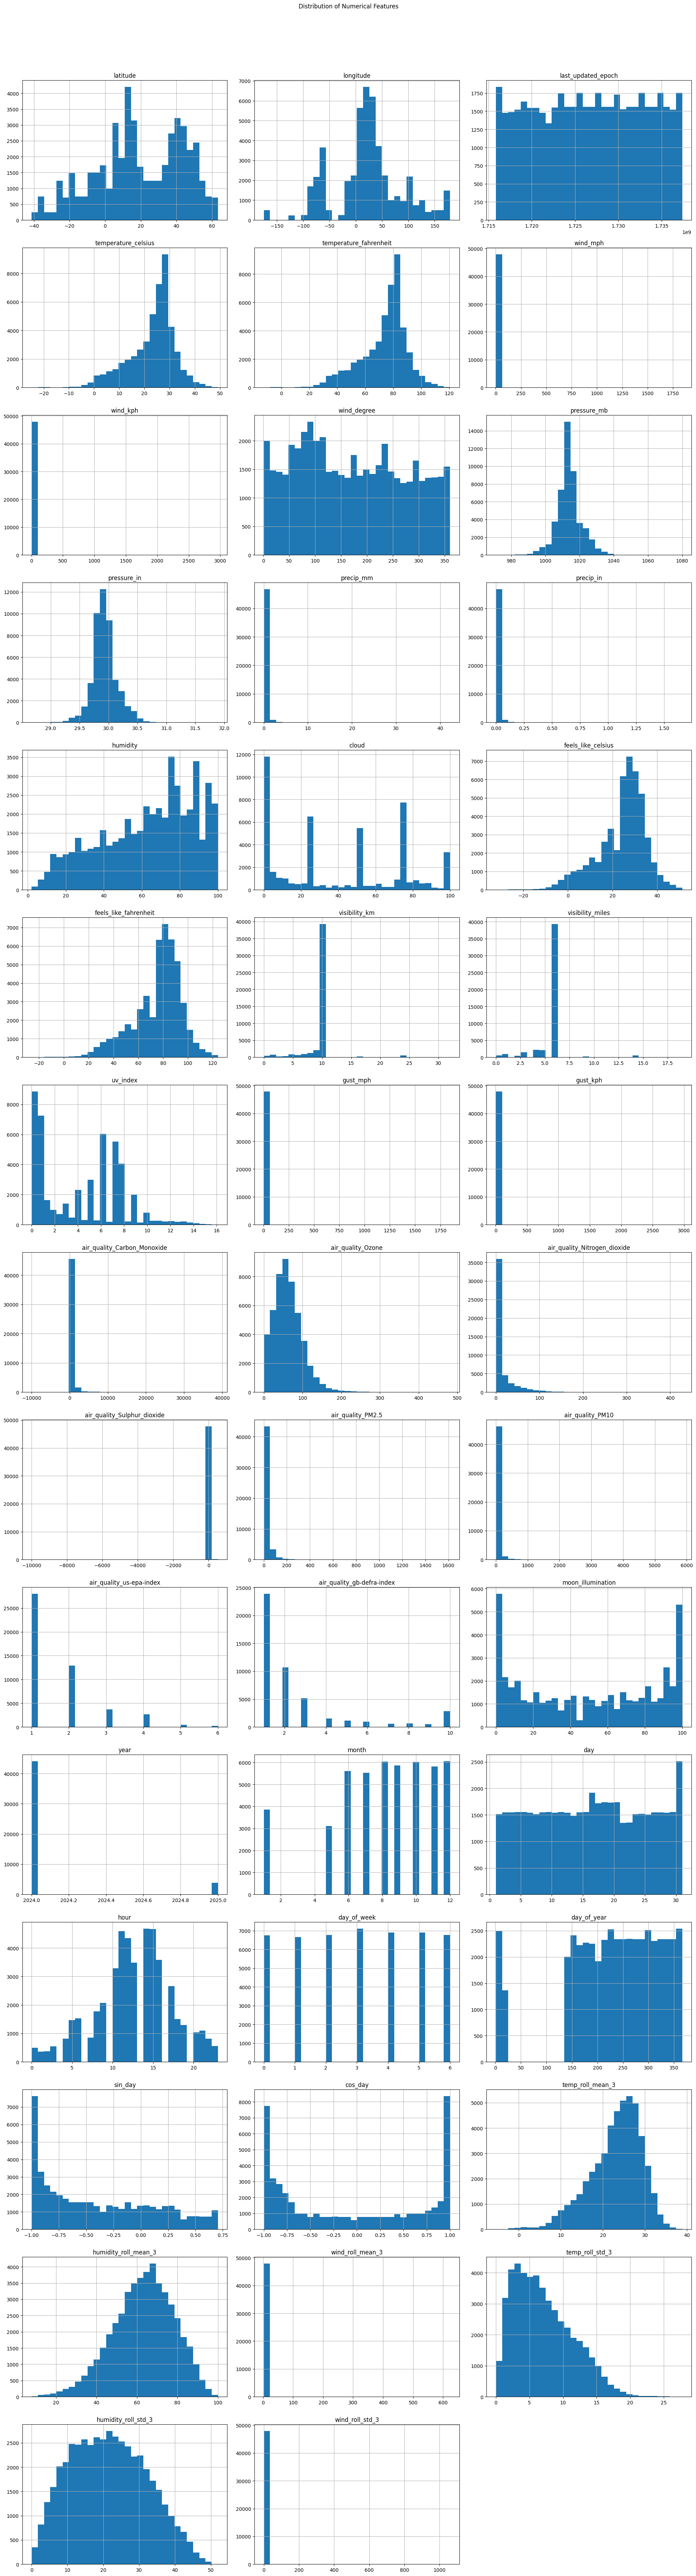

In [21]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Determine the number of columns (N) for the grid
num_columns = numeric_data.shape[1]
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed for a 3-column layout

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_data.columns):
    numeric_data[column].hist(bins=30, ax=axes[i])
    axes[i].set_title(column)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [3]:
# Define dropdowns
country_dropdown = get_country_dropdown(data)

location_dropdown = get_location_dropdown(data)

field_dropdown = get_field_dropdown(data)

# Update location dropdown based on country selection
def update_location_dropdown(change):
    selected_country = change['new']
    locations = data[data['country'] == selected_country]['location_name'].unique().tolist()
    location_dropdown.options = locations

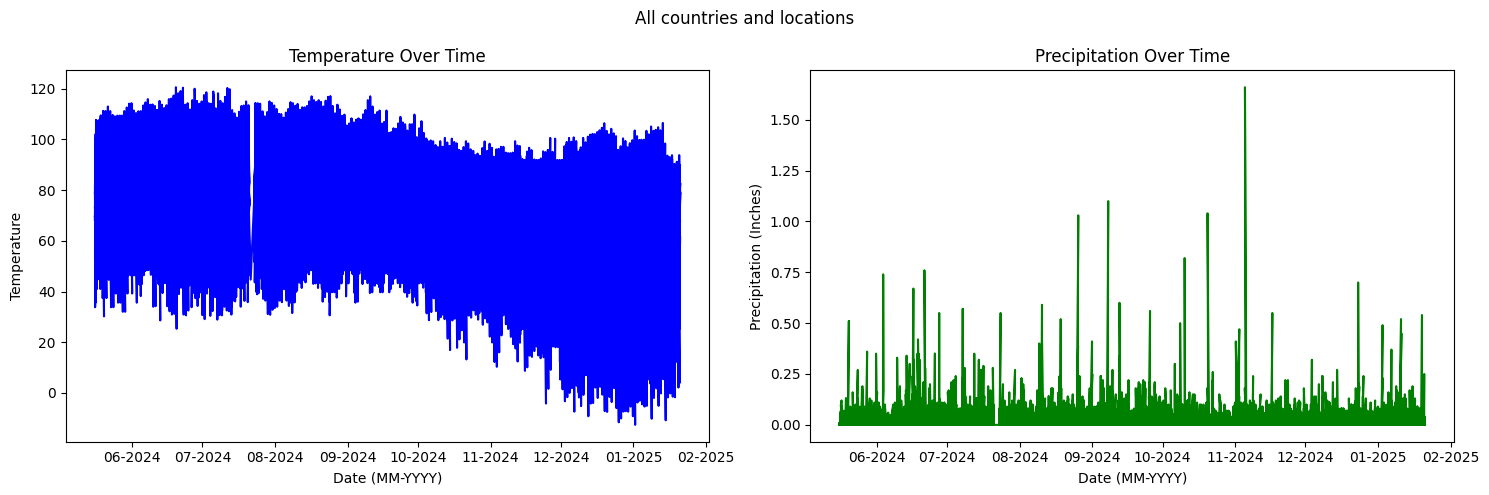

In [23]:
from utils.plot_time_series import plot_time_series
plot_time_series(data,'All countries and locations')

In [24]:
# Update the location dropdown options based on the selected country
def update_location_options(*args):
    selected_country = country_dropdown.value
    location_dropdown.options = data[data['country'] == selected_country]['location_name'].unique()

# Function to update the plot and display it in the output widget
def update_plot_and_display(*args):
    with output_eda:
        output_eda.clear_output(wait=True)
        eda_update_plot(data, country_dropdown.value, location_dropdown.value, field_dropdown.value)

country_dropdown.observe(update_location_options, 'value')

# Create a VBox for the dropdowns
dropdowns = widgets.VBox([country_dropdown, location_dropdown, field_dropdown])

# Create an output widget for the plot
output_eda = widgets.Output()

# Observe changes in the dropdowns to update the plot
country_dropdown.observe(update_plot_and_display, 'value')
location_dropdown.observe(update_plot_and_display, 'value')
field_dropdown.observe(update_plot_and_display, 'value')

# Display the dropdowns to the right of the plot
display(widgets.HBox([output_eda, dropdowns]))

# Initial plot display
update_plot_and_display()

In [25]:
# Create an output widget for the plot
output_anomaly = widgets.Output()

# Create a dropdown widget for anomaly detection
model_dropdown = widgets.Dropdown(
    options=["IsolationForest", "K-Means"],
    description='Model:',
    value='IsolationForest',
    layout=widgets.Layout(width='200px')
)

# Create a button for anomaly detection
detect_button = widgets.Button(
    description="Detect Anomalies",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the plot when the button is clicked
def on_detect_button_click(b):
    with output_anomaly:
        output_anomaly.clear_output(wait=True)
        update_plot_with_anomalies(
            data, output_anomaly, country_dropdown.value, location_dropdown.value, field_dropdown.value, model_dropdown.value
        )

# Attach the event handler to the button
detect_button.on_click(on_detect_button_click)

# Create a VBox for the dropdowns and button
controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, model_dropdown, detect_button])

# Display the controls to the right of the plot
display(widgets.HBox([output_anomaly, controls]))

# Initial plot display
update_plot_and_display()

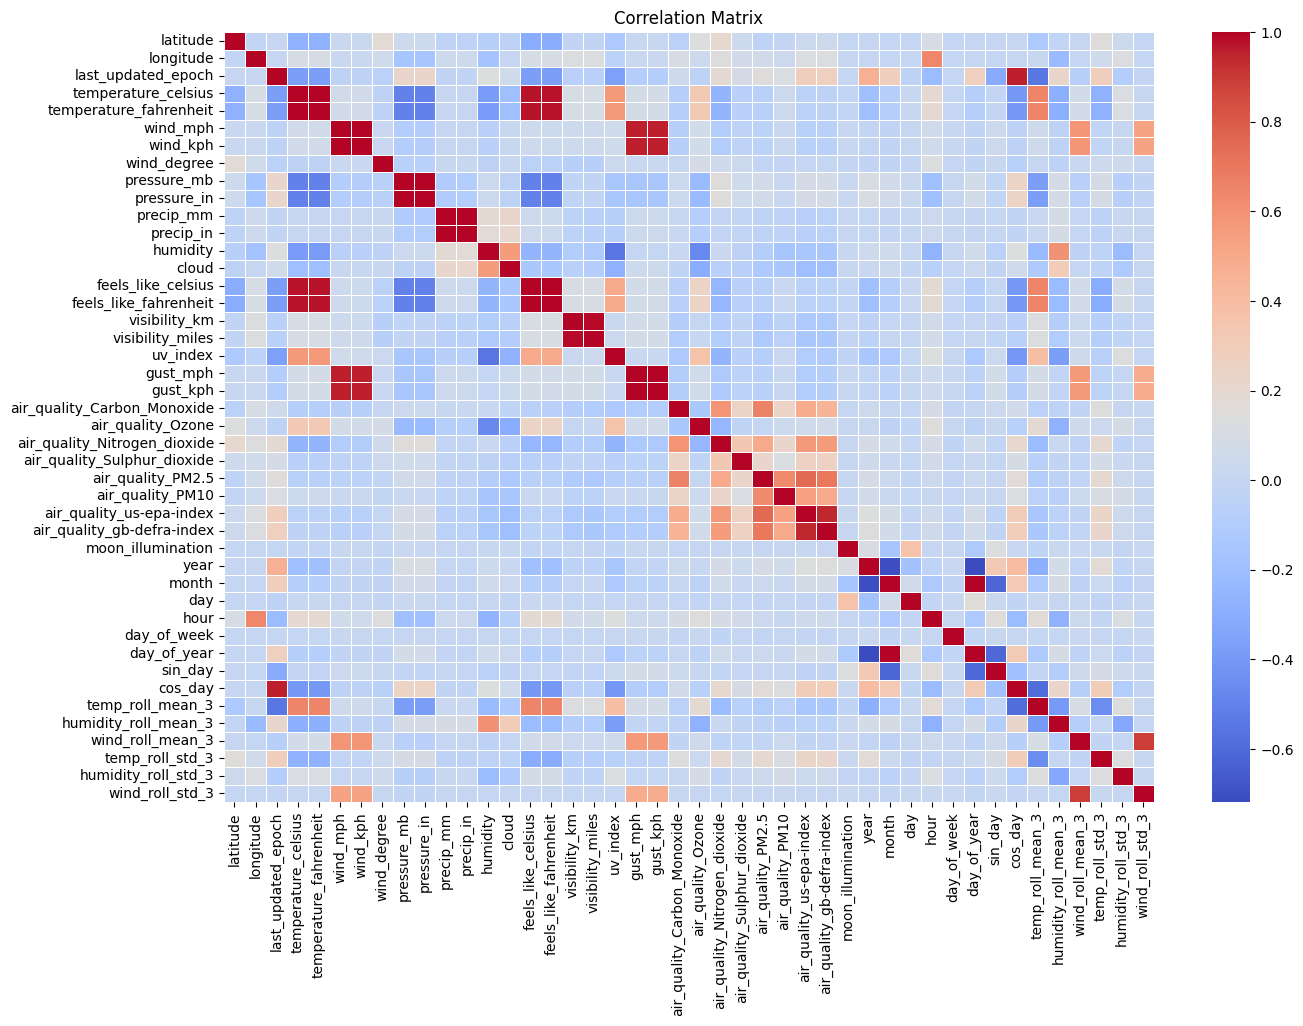

In [26]:
# Visualize correlations between numerical features using a heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap without annotations
plt.figure(figsize=(15, 10))
# annot=False to remove the correlation values from the plot to make it more readable
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Define the list of specific columns to visualize
selected_columns = [
    'temperature_celsius', 'temperature_fahrenheit', 'humidity', 'cloud',
    'uv_index', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5',
    'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index'
]

# Define an output area for the heatmap
output_heatmap = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')

# Function to plot the heatmap
def plot_heatmap(country, location):
    # Filter the data based on the selected country and location
    data_filtered = data[(data['country'] == country) & (data['location_name'] == location)]

    # Select only the specified columns
    specific_data = data_filtered[selected_columns]

    # Drop columns that are completely missing or have no variation
    specific_data = specific_data.dropna(axis=1, how='all')  # Drop columns with all NaN values
    specific_data = specific_data.loc[:, specific_data.nunique() > 1]  # Drop columns with no variation

    # Check if there is enough data for a correlation matrix
    if specific_data.empty or specific_data.shape[1] < 2:
        with output_heatmap:
            output_heatmap.clear_output()
            print("Not enough data to plot the heatmap.")
        return

    # Calculate the correlation matrix
    correlation_matrix = specific_data.corr()

    # Plot the heatmap
    with output_heatmap:
        output_heatmap.clear_output()
        plt.figure(figsize=(15, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title(f'Correlation Matrix for {country}, {location}')
        plt.show()

# Create a button for plotting the heatmap
plot_button = widgets.Button(
    description="Plot Heatmap",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the heatmap when the button is clicked
def on_plot_button_click(b):
    with output_heatmap:
        output_heatmap.clear_output(wait=True)
        plot_heatmap(country_dropdown.value, location_dropdown.value)

plot_button.on_click(on_plot_button_click)

# Display the controls and output
controls = widgets.VBox([country_dropdown, location_dropdown, plot_button])
display(widgets.HBox([output_heatmap, controls]))

In [28]:
# Temperature changes over time across different locations
from utils.map_helper import  create_heat_map
create_heat_map(data, 'temperature_fahrenheit')

In [29]:
# analysis on non-numerical columns (10 columns)
data.select_dtypes(include=['object']).columns

Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase', 'last_updated_datetime'],
      dtype='object')

<span style="font-size:20px;">**Forecasting with Multiple Models**</span>

In [4]:
from utils.forecast_helpers import update_plot_with_forecast_arima

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
# set last_updated as index
data.set_index('last_updated', inplace=True)

# Define an output area for plots and messages
output_arima = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')

# Create sliders for ARIMA parameters
p_slider = widgets.IntSlider(value=2, min=0, max=5, step=1, description='p:')
d_slider = widgets.IntSlider(value=1, min=0, max=2, step=1, description='d:')
q_slider = widgets.IntSlider(value=2, min=0, max=5, step=1, description='q:')
steps_slider = widgets.IntSlider(value=30, min=1, max=100, step=1, description='Steps:')

# Create a button for forecasting
forecast_button = widgets.Button(
    description="Forecast",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the plot when the button is clicked
def on_forecast_button_click(b):
    with output_arima:
        output_arima.clear_output(wait=True)
        update_plot_with_forecast_arima(
            data,output_arima, country_dropdown.value, location_dropdown.value, field_dropdown.value,
            p_slider.value, d_slider.value, q_slider.value, steps_slider.value
        )

# Attach the event handler to the button
forecast_button.on_click(on_forecast_button_click)

# Create a VBox for ARIMA controls
arima_controls = widgets.VBox([p_slider, d_slider, q_slider, steps_slider, forecast_button])

# Display the controls and the output area
controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, arima_controls])
display(widgets.HBox([output_arima, controls]))

In [11]:
# SARIMA model
from utils.sarima_forecast_helpers import update_plot_with_forecast_sarima

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
# set last_updated as index
data.set_index('last_updated', inplace=True)

# Define an output area for plots and messages
output_sarima = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')


# Create sliders for SARIMA parameters
p_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='p:')
d_slider = widgets.IntSlider(value=1, min=0, max=2, step=1, description='d:')
q_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='q:')
P_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='P:')
D_slider = widgets.IntSlider(value=1, min=0, max=2, step=1, description='D:')
Q_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='Q:')
season_slider = widgets.IntSlider(value=12, min=1, max=24, step=1, description='Seasonal Period:')
steps_slider = widgets.IntSlider(value=30, min=1, max=100, step=1, description='Steps:')

# Create a button for forecasting
forecast_button = widgets.Button(
    description="Forecast",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the plot when the button is clicked
def on_forecast_button_click(b):
    with output_sarima:
        output_sarima.clear_output(wait=True)
        update_plot_with_forecast_sarima(
            data, output_sarima,
            country_dropdown.value, location_dropdown.value, field_dropdown.value,
            p_slider.value, d_slider.value, q_slider.value,
            P_slider.value, D_slider.value, Q_slider.value,
            season_slider.value, steps_slider.value
        )

# Attach the event handler to the button
forecast_button.on_click(on_forecast_button_click)

# Create a VBox for SARIMA controls
sarima_controls = widgets.VBox([
    p_slider, d_slider, q_slider, P_slider, D_slider, Q_slider, season_slider, steps_slider, forecast_button
])

# Display the controls and the output area
controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, sarima_controls])
display(widgets.HBox([output_sarima, controls]))

In [8]:
from utils.catboost_helpers import update_plot_with_forecast_catboost

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Define an output area for plots and messages
output_catboost = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')


# Create slider for lag features
lags_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Lags:')

# Create a button for forecasting
forecast_button = widgets.Button(
    description="Forecast",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the plot when the button is clicked
def on_forecast_button_click(b):
    with output_catboost:
        update_plot_with_forecast_catboost(
            data,output_catboost,country_dropdown.value, location_dropdown.value, field_dropdown.value,
            lags_slider.value
        )

# Attach the event handler to the button
forecast_button.on_click(on_forecast_button_click)

# Create a VBox for CatBoost controls
catboost_controls = widgets.VBox([lags_slider, forecast_button])

# Display the controls and the output area
controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, catboost_controls])
display(widgets.HBox([output_catboost, controls]))

In [9]:
from utils.lstm_helpers import update_plot_with_lstm

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
# set last_updated as index
data.set_index('last_updated', inplace=True)

# Define an output area for plots and messages
output_lstm = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')

# Create slider for forecast steps
steps_slider = widgets.IntSlider(value=30, min=1, max=100, step=1, description='Steps:')

# Create slider for training epochs
epochs_slider = widgets.IntSlider(value=20, min=1, max=100, step=1, description='Epochs:')

# Create a button for forecasting
forecast_button = widgets.Button(
    description="Forecast",
    button_style='primary',
    layout=widgets.Layout(width='200px')
)

# Update the plot when the button is clicked
def on_forecast_button_click(b):
    with output_lstm:
        output_lstm.clear_output(wait=True)
        update_plot_with_lstm(
            data, output_lstm, country_dropdown.value, location_dropdown.value, field_dropdown.value,
            steps_slider.value, epochs_slider.value
        )

# Attach the event handler to the button
forecast_button.on_click(on_forecast_button_click)

# Create a VBox for LSTM controls
lstm_controls = widgets.VBox([steps_slider, epochs_slider, forecast_button])

# Display the controls and the output area
controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, lstm_controls])
display(widgets.HBox([output_lstm, controls]))

In [7]:
from utils.ensemble_helpers import update_plot_with_ensemble

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
# set last_updated as index
data.set_index('last_updated', inplace=True)

# Define an output area for plots and messages
output_ensemble = widgets.Output()

# Attach the update function to the country dropdown
country_dropdown.observe(update_location_dropdown, names='value')

# Function to prepare lagged features for CatBoost
def create_lagged_features(data, field, lags):
    df = data[[field]].copy()
    for lag in range(1, lags + 1):
        df[f'{field}_lag_{lag}'] = df[field].shift(lag)
    df = df.dropna()
    return df

# Visualization and widgets
p_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='p:')
d_slider = widgets.IntSlider(value=1, min=0, max=2, step=1, description='d:')
q_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='q:')
P_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='P:')
D_slider = widgets.IntSlider(value=1, min=0, max=2, step=1, description='D:')
Q_slider = widgets.IntSlider(value=1, min=0, max=5, step=1, description='Q:')
season_slider = widgets.IntSlider(value=12, min=1, max=24, step=1, description='Seasonal Period:')
lags_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Lags:')
steps_slider = widgets.IntSlider(value=30, min=1, max=100, step=1, description='Steps:')
forecast_button = widgets.Button(description="Forecast", button_style='primary')


def on_forecast_button_click(b):
    with output_ensemble:
        output_ensemble.clear_output(wait=True)
        update_plot_with_ensemble(
            data, output_ensemble, country_dropdown.value, location_dropdown.value, field_dropdown.value,
            p_slider.value, d_slider.value, q_slider.value,
            P_slider.value, D_slider.value, Q_slider.value,
            season_slider.value, lags_slider.value, steps_slider.value
        )

forecast_button.on_click(on_forecast_button_click)

ensemble_controls = widgets.VBox([
    p_slider, d_slider, q_slider, P_slider, D_slider, Q_slider, season_slider, lags_slider, steps_slider, forecast_button
])

controls = widgets.VBox([country_dropdown, location_dropdown, field_dropdown, ensemble_controls])
display(widgets.HBox([output_ensemble, controls]))

In [11]:
from utils.plot_time_series import filter_data_country_location

Epoch [10/300], Loss: 0.3488
Epoch [20/300], Loss: 0.0421
Epoch [30/300], Loss: 0.0349
Epoch [40/300], Loss: 0.0413
Epoch [50/300], Loss: 0.0335
Epoch [60/300], Loss: 0.0314
Epoch [70/300], Loss: 0.0308
Epoch [80/300], Loss: 0.0296
Epoch [90/300], Loss: 0.0280
Epoch [100/300], Loss: 0.0258
Epoch [110/300], Loss: 0.0231
Epoch [120/300], Loss: 0.0201
Epoch [130/300], Loss: 0.0185
Epoch [140/300], Loss: 0.0185
Epoch [150/300], Loss: 0.0183
Epoch [160/300], Loss: 0.0182
Epoch [170/300], Loss: 0.0181
Epoch [180/300], Loss: 0.0180
Epoch [190/300], Loss: 0.0179
Epoch [200/300], Loss: 0.0178
Epoch [210/300], Loss: 0.0177
Epoch [220/300], Loss: 0.0176
Epoch [230/300], Loss: 0.0175
Epoch [240/300], Loss: 0.0175
Epoch [250/300], Loss: 0.0174
Epoch [260/300], Loss: 0.0173
Epoch [270/300], Loss: 0.0172
Epoch [280/300], Loss: 0.0172
Epoch [290/300], Loss: 0.0171
Epoch [300/300], Loss: 0.0170


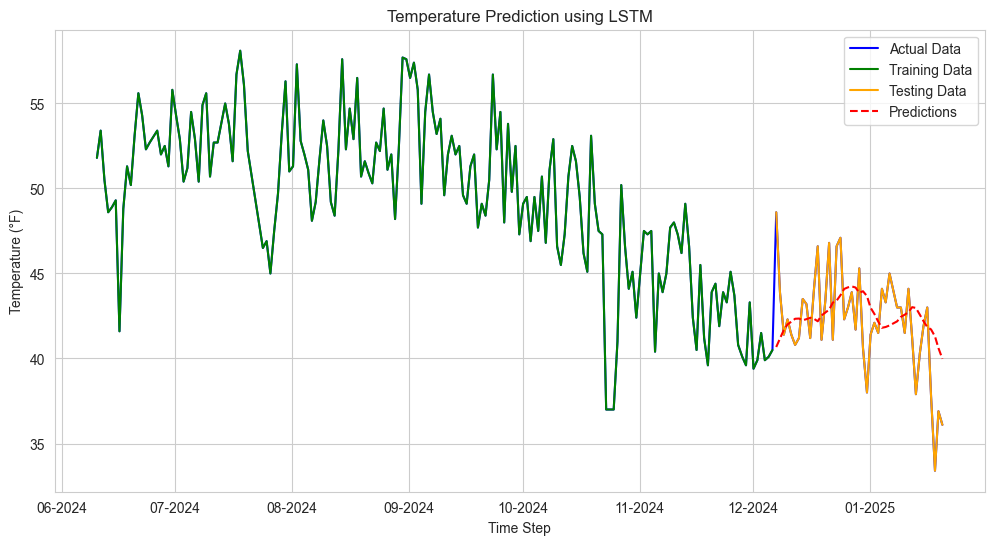

In [19]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
# Filter and prepare data
dataclass_transform = filter_data_country_location(data, 'United States of America', 'Washington Harbor')
# Ensure 'last_updated' is in datetime format
dataclass_transform['last_updated'] = pd.to_datetime(dataclass_transform['last_updated'])
# set last_updated as index
dataclass_transform.set_index('last_updated', inplace=True)
y = dataclass_transform['temperature_fahrenheit'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Create sequences for LSTM
sequence_length = 10  # Number of time steps to look back
x_sequences, y_sequences = [], []
for i in range(len(y_scaled) - sequence_length):
    x_sequences.append(y_scaled[i:i + sequence_length])
    y_sequences.append(y_scaled[i + sequence_length])

x_sequences = np.array(x_sequences)
y_sequences = np.array(y_sequences)

# Convert to PyTorch tensors
x_sequences = torch.tensor(x_sequences, dtype=torch.float32)
y_sequences = torch.tensor(y_sequences, dtype=torch.float32)

# Split into training and testing sets
train_size = int(0.8 * len(x_sequences))
x_train, x_test = x_sequences[:train_size], x_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

# Define the LSTM model
class TemperatureLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(TemperatureLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Initial hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Hyperparameters
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
learning_rate = 0.001
num_epochs = 300

# Initialize the model, loss function, and optimizer
model = TemperatureLSTM(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
model.train()
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

# Inverse transform predictions and ground truth to original scale
y_pred = scaler.inverse_transform(y_pred.numpy())
y_train_original = scaler.inverse_transform(y_train.numpy())
y_test_original = scaler.inverse_transform(y_test.numpy())
y_full = np.concatenate([y_train_original, y_test_original])  # Full dataset

# Combine predictions for plotting
y_combined_pred = np.concatenate([y_train_original, y_pred])  # Predictions appended to train
# Adjust dates to align with the generated sequences
dates = dataclass_transform.index[sequence_length:]  # Exclude the initial dates removed during sequence creation

# Ensure alignment of dates with the full dataset
dates_full = dates[:len(y_full)]  # Align dates with the full dataset length
train_dates = dates[:len(y_train_original)]  # Align dates with training data
test_dates = dates[len(y_train_original):len(y_full)]  # Align dates with testing data

# Plot full train, test, and prediction
plt.figure(figsize=(12, 6))
# plt.plot(y_full, label='Actual Data', color='blue')
# plt.plot(range(len(y_train_original)), y_train_original, label='Training Data', color='green')
# plt.plot(range(len(y_train_original), len(y_full)), y_test_original, label='Testing Data', color='orange')
# plt.plot(range(len(y_train_original), len(y_full)), y_pred, label='Predictions', color='red', linestyle='dashed')
plt.plot(dates_full, y_full, label='Actual Data', color='blue')
plt.plot(train_dates, y_train_original, label='Training Data', color='green')
plt.plot(test_dates, y_test_original, label='Testing Data', color='orange')
plt.plot(test_dates, y_pred, label='Predictions', color='red', linestyle='dashed')

# Format the x-axis with dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  # MM-YYYY format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Monthly intervals


plt.legend()
plt.title('Temperature Prediction using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.show()

In [37]:
# evaluate model performance using different metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred.numpy())
y_test_original = scaler.inverse_transform(y_test.numpy())

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print metrics
print(f"Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 8.3686
Root Mean Squared Error (RMSE): 2.8929
Mean Absolute Error (MAE): 2.2405
R² Score: 0.0357


<strong>Predicting with Random Forest Regressor multiple lagged features</strong>

Test Set Metrics:
MAE: 1.23°C
RMSE: 1.63°C


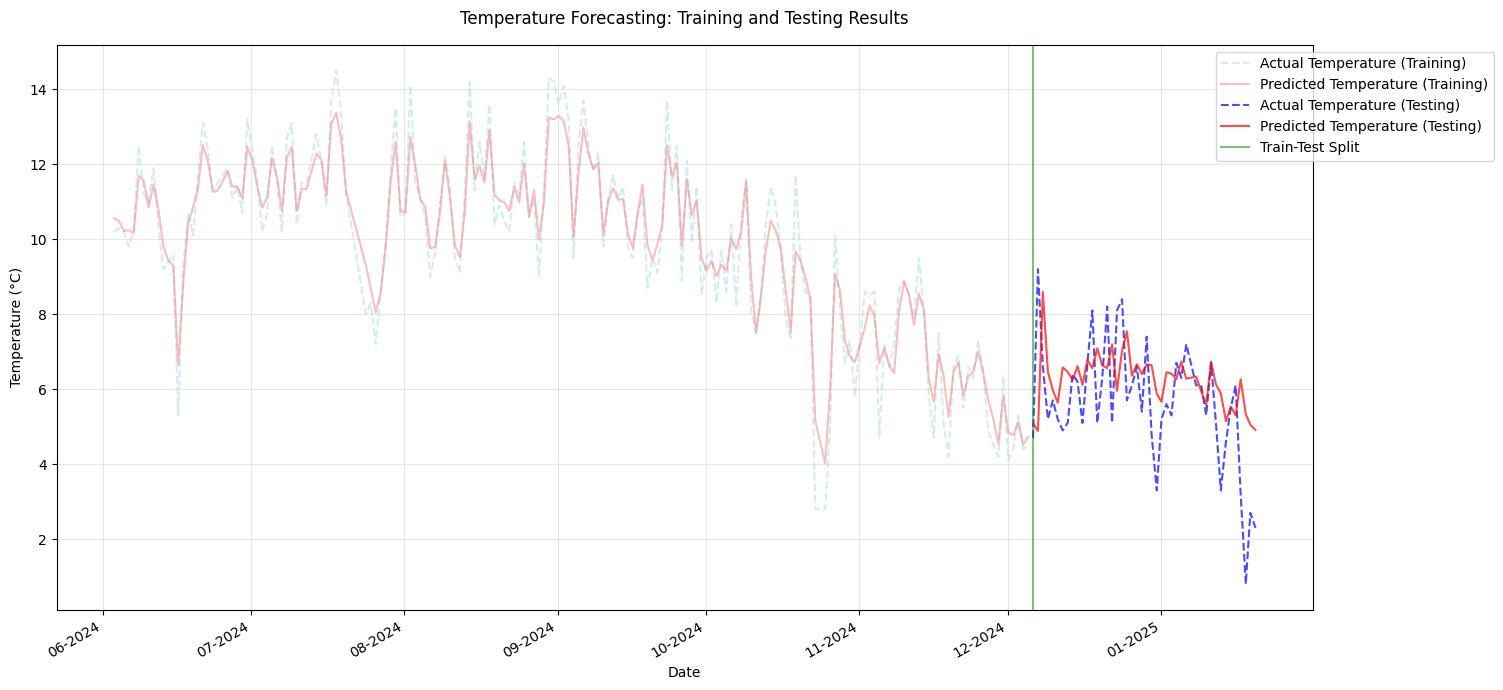

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and filter data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
data = filter_data_country_location(data, 'United States of America', 'Washington Harbor')

# Ensure 'last_updated' is in datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Sort data by time
data = data.sort_values(by='last_updated')

# Create lagged features
lags = 3
for lag in range(1, lags + 1):
    data[f'temperature_lag_{lag}'] = data['temperature_celsius'].shift(lag)
    data[f'humidity_lag_{lag}'] = data['humidity'].shift(lag)
    data[f'wind_speed_lag_{lag}'] = data['wind_kph'].shift(lag)
    data[f'pressure_lag_{lag}'] = data['pressure_mb'].shift(lag)
    data[f'precipitation_lag_{lag}'] = data['precip_mm'].shift(lag)
    data[f'uv_index_lag_{lag}'] = data['uv_index'].shift(lag)

# Drop rows with missing values
data = data.dropna()

# Define target and features
target = 'temperature_celsius'
features = [col for col in data.columns if 'lag' in col]

X = data[features]
y = data[target]

# Train-test split (time-based split)
split_index = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Get dates for both training and testing sets
train_dates = data['last_updated'].iloc[:split_index]
test_dates = data['last_updated'].iloc[split_index:]

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test Set Metrics:")
print(f"MAE: {mae:.2f}°C")
print(f"RMSE: {rmse:.2f}°C")

# Create the plot
plt.figure(figsize=(15, 7))

# Plot training data
plt.plot(train_dates, y_train.values, label="Actual Temperature (Training)",
         color='lightblue', linestyle='--', alpha=0.5)
plt.plot(train_dates, y_train_pred, label="Predicted Temperature (Training)",
         color='lightcoral', alpha=0.5)

# Plot testing data
plt.plot(test_dates, y_test.values, label="Actual Temperature (Testing)",
         color='blue', linestyle='--', alpha=0.7)
plt.plot(test_dates, y_test_pred, label="Predicted Temperature (Testing)",
         color='red', alpha=0.7)

# Add a vertical line to separate training and testing data
plt.axvline(x=test_dates.iloc[0], color='green', linestyle='-', alpha=0.5,
            label='Train-Test Split')

# Customize the plot
plt.title("Temperature Forecasting: Training and Testing Results", fontsize=12, pad=15)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Temperature (°C)", fontsize=10)

# Format x-axis
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

# Add grid, legend, and other formatting
plt.grid(True, alpha=0.3)
plt.legend(loc='best', bbox_to_anchor=(1.15, 1))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

Analysis performed by: Uttam Kumar P
Analysis timestamp: 2025-01-23 05:26:14


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89995D+00    |proj g|=  1.41434D-01

At iterate    5    f=  1.78240D+00    |proj g|=  1.71960D-02

At iterate   10    f=  1.77550D+00    |proj g|=  2.70865D-03

At iterate   15    f=  1.77457D+00    |proj g|=  7.96024D-03

At iterate   20    f=  1.77414D+00    |proj g|=  2.44725D-03

At iterate   25    f=  1.77408D+00    |proj g|=  6.96933D-04

At iterate   30    f=  1.77407D+00    |proj g|=  2.56990D-04

At iterate   35    f=  1.77407D+00    |proj g|=  2.68129D-04

At iterate   40    f=  1.77407D+00    |proj g|=  4.39586D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

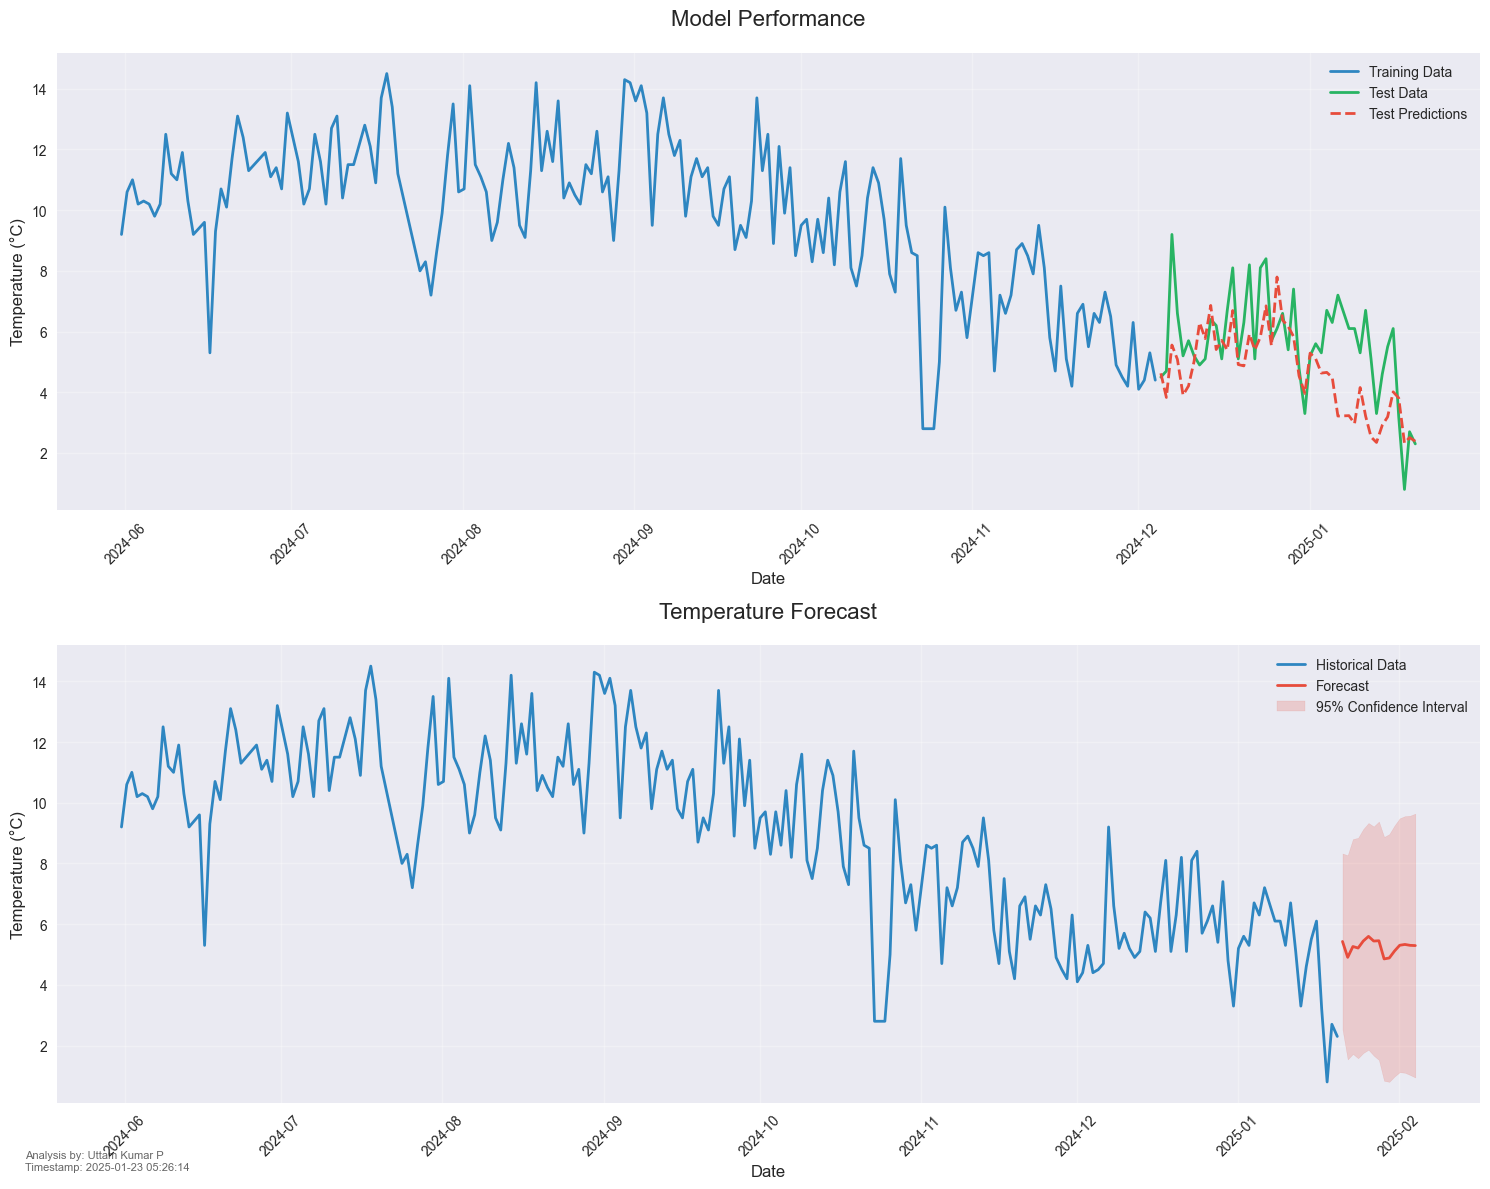

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Current settings
CURRENT_UTC = "2025-01-23 05:26:14"
CURRENT_USER = "Uttam Kumar P"

print(f"Analysis performed by: {CURRENT_USER}")
print(f"Analysis timestamp: {CURRENT_UTC}")

def calculate_metrics(y_true, y_pred):
    """Calculate performance metrics."""
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    }
    return metrics

def filter_data_country_location(df, country, location):
    """Filter data for specific country and location."""
    return df[(df['country'] == country) & (df['location_name'] == location)].copy()

def prepare_data(data, features, target):
    """Prepare and scale features."""
    scaler = StandardScaler()
    features_scaled = pd.DataFrame(
        scaler.fit_transform(data[features]),
        columns=features,
        index=data.index
    )
    return features_scaled, scaler

def create_forecast(model_results, steps, future_dates, features_scaler, data, features):
    """Create forecast for future dates."""
    future_exog = pd.DataFrame(
        np.tile(data[features].mean().values, (steps, 1)),
        columns=features,
        index=future_dates
    )
    future_exog_scaled = pd.DataFrame(
        features_scaler.transform(future_exog),
        columns=features,
        index=future_dates
    )
    return model_results.get_forecast(steps=steps, exog=future_exog_scaled)

# Load and prepare data
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
data = filter_data_country_location(data, 'United States of America', 'Washington Harbor')
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Set datetime index
data.set_index('last_updated', inplace=True)
data.sort_index(inplace=True)

# Split data into train and test
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define features and target
features = ['humidity', 'pressure_mb', 'precip_mm', 'uv_index', 'wind_kph']
target = 'temperature_celsius'

# Prepare features for train and test
train_scaled, features_scaler = prepare_data(train_data, features, target)
test_scaled = pd.DataFrame(
    features_scaler.transform(test_data[features]),
    columns=features,
    index=test_data.index
)

# Fit SARIMAX model
model = SARIMAX(train_data[target],
                exog=train_scaled,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))

results = model.fit()

# Make predictions on test set
test_predictions = results.get_forecast(steps=len(test_data), exog=test_scaled)
test_pred_mean = test_predictions.predicted_mean

# Calculate performance metrics
metrics = calculate_metrics(test_data[target], test_pred_mean)

# Generate future dates for forecasting
forecast_steps = 15
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                             periods=forecast_steps,
                             freq='D')

# Create forecast
forecast = create_forecast(results, forecast_steps, future_dates, features_scaler, data, features)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create visualization
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Model Performance
ax1.plot(train_data.index, train_data[target], label='Training Data', color='#2E86C1', linewidth=2)
ax1.plot(test_data.index, test_data[target], label='Test Data', color='#28B463', linewidth=2)
ax1.plot(test_data.index, test_pred_mean, label='Test Predictions', color='#E74C3C', linewidth=2, linestyle='--')
ax1.set_title('Model Performance', fontsize=16, pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Future Forecast
ax2.plot(data.index, data[target], label='Historical Data', color='#2E86C1', linewidth=2)
ax2.plot(future_dates, forecast_mean, label='Forecast', color='#E74C3C', linewidth=2)
ax2.fill_between(future_dates,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='#E74C3C',
                 alpha=0.2,
                 label='95% Confidence Interval')
ax2.set_title('Temperature Forecast', fontsize=16, pad=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Rotate x-axis labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Add analysis information
plt.figtext(0.02, 0.02, f'Analysis by: {CURRENT_USER}\nTimestamp: {CURRENT_UTC}',
            fontsize=8, alpha=0.7)

plt.tight_layout()

# Print model performance metrics
print("\nModel Performance Metrics:")
print("=========================")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Print model information
print("\nModel Information:")
print("=================")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")

# Create forecast summary DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Temperature': forecast_mean.round(2),
    'Lower_CI': forecast_ci.iloc[:, 0].round(2),
    'Upper_CI': forecast_ci.iloc[:, 1].round(2)
})

# Print summary statistics
print("\nForecast Summary Statistics:")
print("===========================")
print(f"Average Predicted Temperature: {forecast_mean.mean():.2f}°C")
print(f"Min Predicted Temperature: {forecast_mean.min():.2f}°C")
print(f"Max Predicted Temperature: {forecast_mean.max():.2f}°C")

pd.set_option('display.max_rows', None)
print(forecast_df.to_string(index=False))

plt.show()

Analysis performed by: Uttam Kumar P
Analysis timestamp: 2025-01-23 05:26:14

Data Overview:
Total records: 227
Date range: 2024-05-31 07:15:00 to 2025-01-20 02:15:00

Sample of the data:
                                      country      location_name  latitude  \
last_updated                                                                 
2024-05-31 07:15:00  United States of America  Washington Harbor     48.08   
2024-06-01 07:30:00  United States of America  Washington Harbor     48.08   
2024-06-02 07:00:00  United States of America  Washington Harbor     48.08   
2024-06-03 07:15:00  United States of America  Washington Harbor     48.08   
2024-06-04 07:15:00  United States of America  Washington Harbor     48.08   

                     longitude             timezone  last_updated_epoch  \
last_updated                                                              
2024-05-31 07:15:00    -123.04  America/Los_Angeles          1717164900   
2024-06-01 07:30:00    -123.04  America/

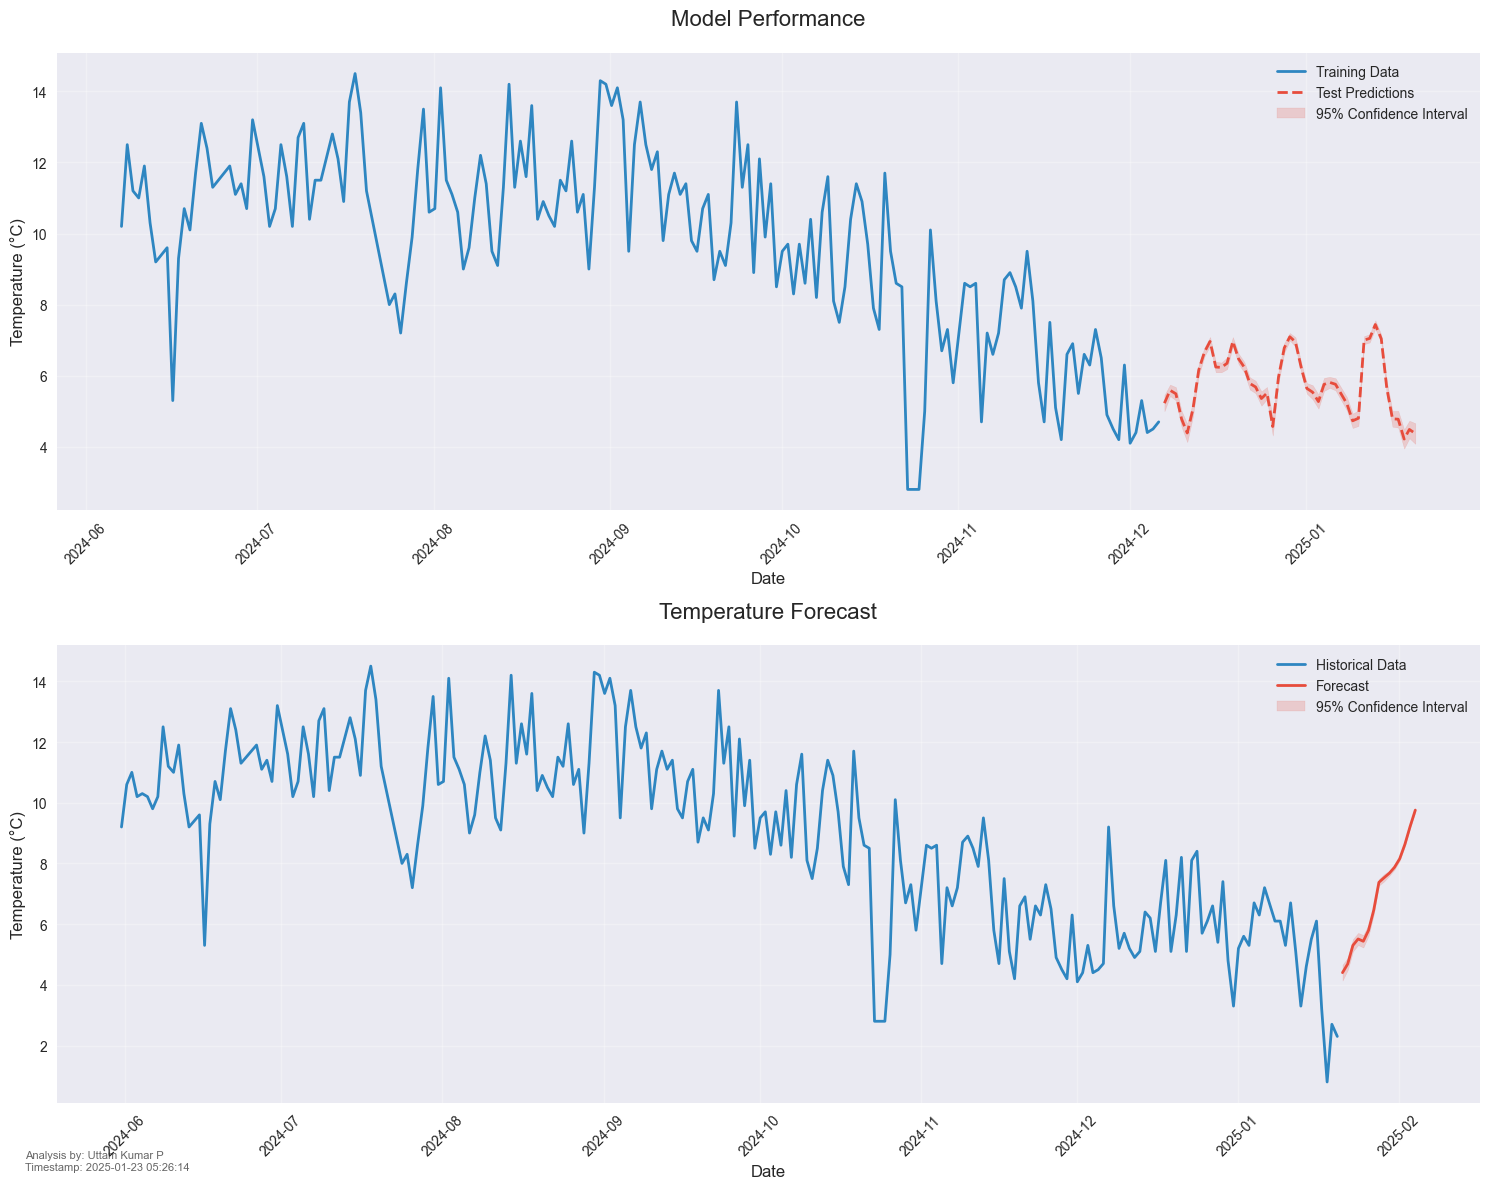

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

print(f"Analysis performed by: {CURRENT_USER}")
print(f"Analysis timestamp: {CURRENT_UTC}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y).reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout_rate = dropout_rate

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

def enable_dropout(model):
    """Enable dropout during inference"""
    for m in model.modules():
        if isinstance(m, nn.Dropout):
            m.train()

def predict_with_uncertainty(model, X, n_samples=100):
    """Make predictions with uncertainty estimation using Monte Carlo Dropout"""
    predictions = []
    model.eval()
    enable_dropout(model)

    with torch.no_grad():
        X_tensor = torch.FloatTensor(X)
        for _ in range(n_samples):
            y_pred = model(X_tensor)
            predictions.append(y_pred.numpy())

    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)

    return mean_pred, std_pred

def create_sequences(data, seq_length):
    """Create sequences for LSTM input"""
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:(i + seq_length)])
        ys.append(data[i + seq_length, 0])  # Take only temperature value
    return np.array(xs), np.array(ys)

# Starting with your data loading
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')
data = data[data['country'] == 'United States of America'][data['location_name'] == 'Washington Harbor']
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Set datetime index and sort
data.set_index('last_updated', inplace=True)
data.sort_index(inplace=True)

print("\nData Overview:")
print(f"Total records: {len(data)}")
print(f"Date range: {data.index.min()} to {data.index.max()}")
print("\nSample of the data:")
print(data.head())

# Define features and target
features = ['temperature_celsius', 'humidity', 'pressure_mb', 'precip_mm', 'uv_index', 'wind_kph']
target_idx = features.index('temperature_celsius')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Create sequences
seq_length = 7
X_seq, y_seq = create_sequences(scaled_data, seq_length)

# Split data into train and test sets
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Create DataLoaders
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model with dropout
model = LSTMModel(input_size=len(features), hidden_size=50, num_layers=2, output_size=1, dropout_rate=0.2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 100
train_losses = []

print("\nTraining started...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss/len(train_loader))
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}')

# Testing with uncertainty
test_predictions = []
test_uncertainties = []

for X_batch, _ in test_loader:
    mean_pred, std_pred = predict_with_uncertainty(model, X_batch)
    test_predictions.extend(mean_pred)
    test_uncertainties.extend(std_pred)

test_predictions = np.array(test_predictions)
test_uncertainties = np.array(test_uncertainties)

# Transform predictions and calculate confidence intervals
test_predictions_transformed = np.zeros((len(test_predictions), len(features)))
test_predictions_transformed[:, target_idx] = test_predictions.flatten()
test_predictions = scaler.inverse_transform(test_predictions_transformed)[:, target_idx]

# Calculate confidence intervals (95%)
confidence_interval = 1.96 * test_uncertainties.flatten()
test_ci_lower = test_predictions - confidence_interval
test_ci_upper = test_predictions + confidence_interval

# Future predictions with uncertainty
forecast_steps = 15
last_sequence = torch.FloatTensor(X_seq[-1:])
forecast_predictions = []
forecast_uncertainties = []

for _ in range(forecast_steps):
    mean_pred, std_pred = predict_with_uncertainty(model, last_sequence)
    forecast_predictions.append(mean_pred[0])
    forecast_uncertainties.append(std_pred[0])

    new_sequence = np.zeros((1, seq_length, len(features)))
    new_sequence[0, :-1, :] = last_sequence[0, 1:, :]
    new_sequence[0, -1, target_idx] = mean_pred[0]
    last_sequence = torch.FloatTensor(new_sequence)

forecast_predictions = np.array(forecast_predictions)
forecast_uncertainties = np.array(forecast_uncertainties)

# Transform forecast predictions and calculate confidence intervals
forecast_transformed = np.zeros((len(forecast_predictions), len(features)))
forecast_transformed[:, target_idx] = forecast_predictions.flatten()
forecast_predictions = scaler.inverse_transform(forecast_transformed)[:, target_idx]

# Calculate forecast confidence intervals
forecast_ci = 1.96 * forecast_uncertainties.flatten()
forecast_ci_lower = forecast_predictions - forecast_ci
forecast_ci_upper = forecast_predictions + forecast_ci

# Generate future dates
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                             periods=forecast_steps,
                             freq='D')

# Plotting
plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Model Performance with confidence intervals
train_dates = data.index[seq_length:train_size+seq_length]
test_dates = data.index[train_size+seq_length:]

ax1.plot(train_dates, data['temperature_celsius'][seq_length:train_size+seq_length],
         label='Training Data', color='#2E86C1', linewidth=2)
ax1.plot(test_dates, test_predictions,
         label='Test Predictions', color='#E74C3C', linewidth=2, linestyle='--')
ax1.fill_between(test_dates,
                 test_ci_lower,
                 test_ci_upper,
                 color='#E74C3C', alpha=0.2,
                 label='95% Confidence Interval')
ax1.set_title('Model Performance', fontsize=16, pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Future Forecast with confidence intervals
ax2.plot(data.index, data['temperature_celsius'], label='Historical Data', color='#2E86C1', linewidth=2)
ax2.plot(future_dates, forecast_predictions, label='Forecast', color='#E74C3C', linewidth=2)
ax2.fill_between(future_dates,
                 forecast_ci_lower,
                 forecast_ci_upper,
                 color='#E74C3C', alpha=0.2,
                 label='95% Confidence Interval')
ax2.set_title('Temperature Forecast', fontsize=16, pad=20)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.figtext(0.02, 0.02, f'Analysis by: {CURRENT_USER}\nTimestamp: {CURRENT_UTC}',
            fontsize=8, alpha=0.7)

plt.tight_layout()

# Create forecast summary DataFrame with confidence intervals
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Temperature': forecast_predictions.round(2),
    'Lower_CI': forecast_ci_lower.round(2),
    'Upper_CI': forecast_ci_upper.round(2)
})


# Calculate and print metrics
metrics = {
    'RMSE': np.sqrt(mean_squared_error(data['temperature_celsius'][train_size+seq_length:], test_predictions)),
    'MAE': mean_absolute_error(data['temperature_celsius'][train_size+seq_length:], test_predictions),
    'R2': r2_score(data['temperature_celsius'][train_size+seq_length:], test_predictions)
}

print("\nModel Performance Metrics:")
print("=========================")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


plt.show()

Number of samples in X: 227
Number of labels in y: 227
Feature Importance (CatBoost):
                         Feature  Importance
2                       uv_index   37.108454
3    air_quality_Carbon_Monoxide   12.967473
1                          cloud    9.012518
4              air_quality_Ozone    8.225836
7              air_quality_PM2.5    7.589859
0                       humidity    7.535253
6    air_quality_Sulphur_dioxide    6.614379
5   air_quality_Nitrogen_dioxide    5.984605
8               air_quality_PM10    4.695517
10    air_quality_gb-defra-index    0.242663
9       air_quality_us-epa-index    0.023444


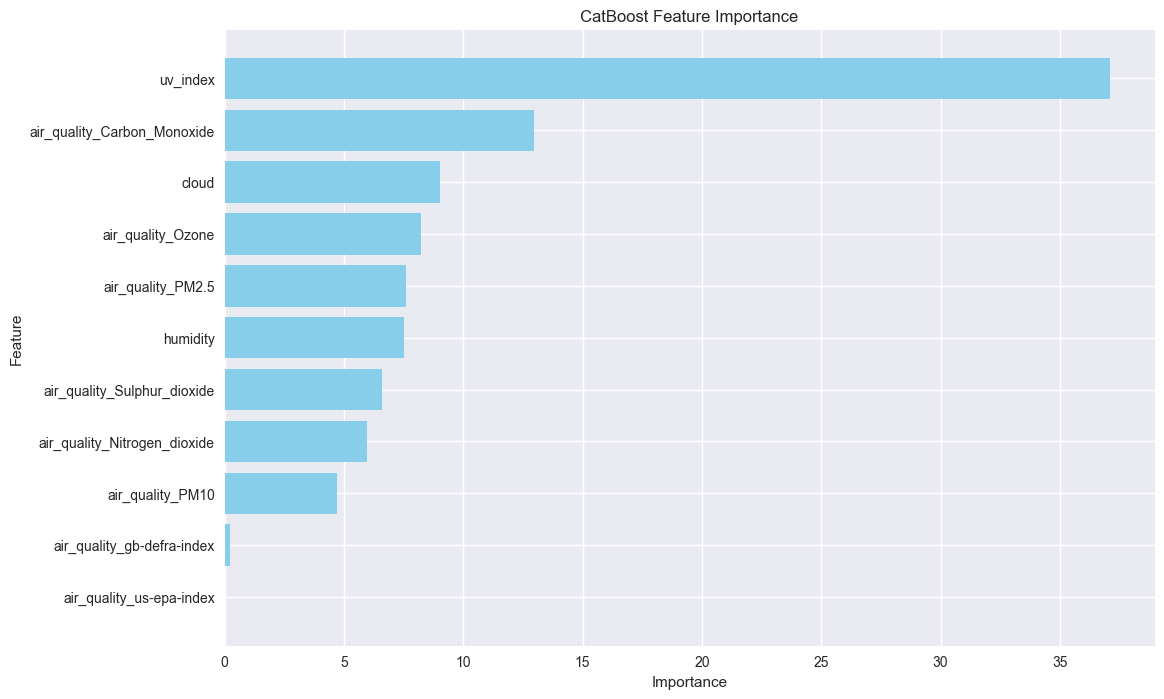

In [41]:
# Feature importance analysis using CatBoost
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool

# Define the target and features
target = 'temperature_celsius'  # Replace with your target variable
features = [
    'humidity', 'cloud', 'uv_index',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index', 'air_quality_gb-defra-index'
]

# Handle missing values consistently
X = data[features].dropna()  # Drop rows with missing feature values
y = data[target].dropna()    # Drop rows with missing target values

# Ensure indices match between X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Check lengths to ensure alignment
print(f"Number of samples in X: {len(X)}")
print(f"Number of labels in y: {len(y)}")

# Define and train the CatBoost model
catboost_model = CatBoostRegressor(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    silent=True
)
catboost_model.fit(X, y)

# Get feature importance
feature_importances = catboost_model.get_feature_importance(Pool(X, y))
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importance (CatBoost):")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

SHAP Summary Plot:


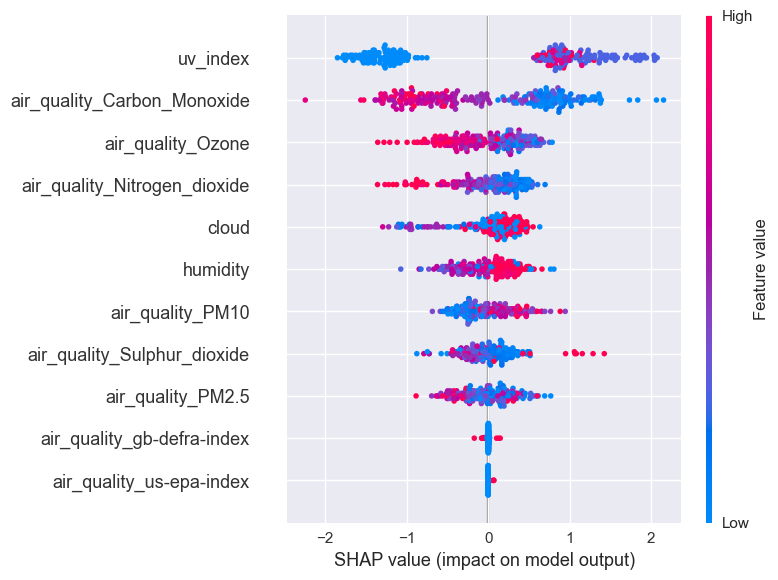

In [42]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary plot
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X)

In [43]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

# Inspect the data for required columns
print(data.head())

# Define columns for spatial analysis
latitude_col = 'latitude'
longitude_col = 'longitude'
attribute_col = 'temperature_celsius'  # Replace with the attribute to analyze


                                      country      location_name  latitude  \
last_updated                                                                 
2024-05-31 07:15:00  United States of America  Washington Harbor     48.08   
2024-06-01 07:30:00  United States of America  Washington Harbor     48.08   
2024-06-02 07:00:00  United States of America  Washington Harbor     48.08   
2024-06-03 07:15:00  United States of America  Washington Harbor     48.08   
2024-06-04 07:15:00  United States of America  Washington Harbor     48.08   

                     longitude             timezone  last_updated_epoch  \
last_updated                                                              
2024-05-31 07:15:00    -123.04  America/Los_Angeles          1717164900   
2024-06-01 07:30:00    -123.04  America/Los_Angeles          1717252200   
2024-06-02 07:00:00    -123.04  America/Los_Angeles          1717336800   
2024-06-03 07:15:00    -123.04  America/Los_Angeles          1717424100   
202

<Figure size 1200x800 with 0 Axes>

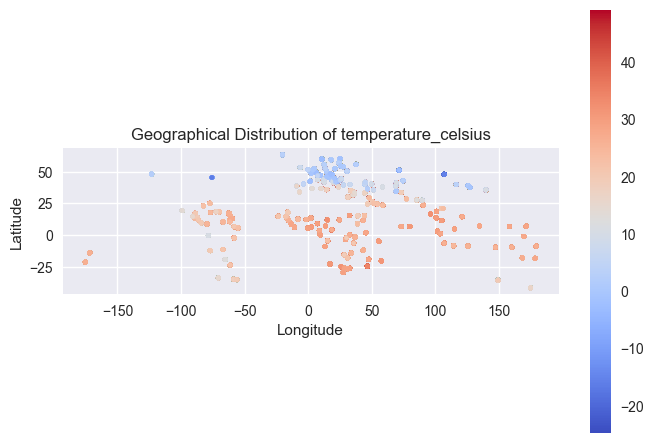

In [44]:
from shapely.geometry import Point
# load data again
data = pd.read_csv('data/GlobalWeatherRepository_filtered.csv')

# Create a GeoDataFrame for spatial analysis
geometry = [Point(xy) for xy in zip(data[longitude_col], data[latitude_col])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Plot geographical patterns
plt.figure(figsize=(12, 8))
geo_df.plot(column=attribute_col, cmap='coolwarm', legend=True, markersize=10)
plt.title(f'Geographical Distribution of {attribute_col}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
